# Predicting Age Using Significant Explanatory Variables

## Introduction

Various factors may contribute to estimating a person’s age. Factors which may be associated with age include employment status, education level, and/or marital status. According to Statistics Canada, 15 to 24 were the most likely to work part-time, followed by workers aged 55 and older. People in the core working ages of 25 to 54 were the least likely to be part-time. Additionally, women were twice as likely as men to work part-time. These part-time rates have been relatively stable over the last 20 years (Patterson, 2018). A 2013 study published by the US Bureau of Labor Statistics found that marriage patterns differed markedly by age at marriage and by educational attainment (Aughinbaugh et al., 2013).

The data we will be using was collected by Ronny Kohavi and Barry Becker, and extracted from the 1994 Census bureau database. This data contains several variables: age (17 and up), education level (preschool and above), marital status, relationship status, race, gender, occupation, weekly working hours, etc. We will be focusing on the prediction of average age in our project. 

Using this dataset, we will answer the following question:

> **“What is the predicted average age of an adult based on significant explanatory variables?”**

## Exploratory Data Analysis

In [23]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(broom)
library(leaps)
library(mltools)

ERROR: Error in library(infer): there is no package called 'infer'


## Exploratory Data Analysis

In [30]:
adult_census <- read.csv('https://raw.githubusercontent.com/chrisp-6/stat301_project/main/adult.csv')
head(adult_census)

# data from https://www.kaggle.com/datasets/uciml/adult-census-income, downloaded locally first and added to github

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [25]:
nrow(adult_census)

[1] 32561

In [31]:
# transforming character columns to factors
adult_census <- adult_census %>% mutate_if(is.character, as.factor)
head(adult_census)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [33]:
# a summary of the data set

summary(adult_census)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education.num                 marital.status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

Some factors that we think should be associated with age:

- Education level (`education` and `education.num`)
- Marital status

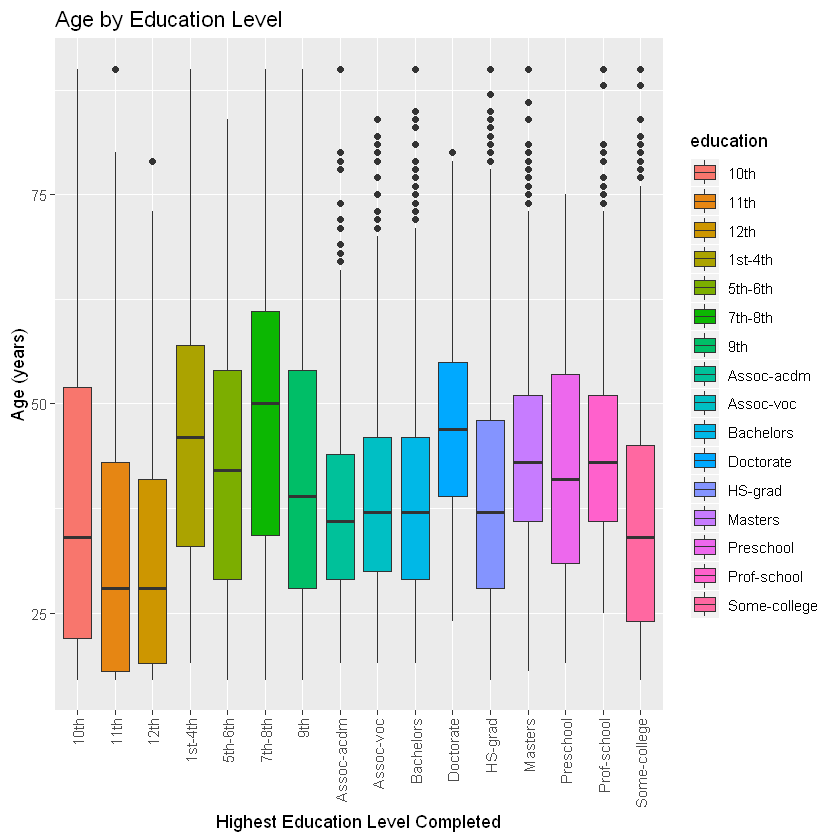

In [48]:
education_plot <- ggplot(adult_census, aes(x=education, y = age, fill = education)) +
geom_boxplot() +
labs(x= "Highest Education Level Completed", y="Age (years)", title= "Age by Education Level") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
education_plot

We can see that the age, and the distribution of the age, does appear to vary by the education level completed, with lower education level completed appeart to be slightly associated to lower median age.

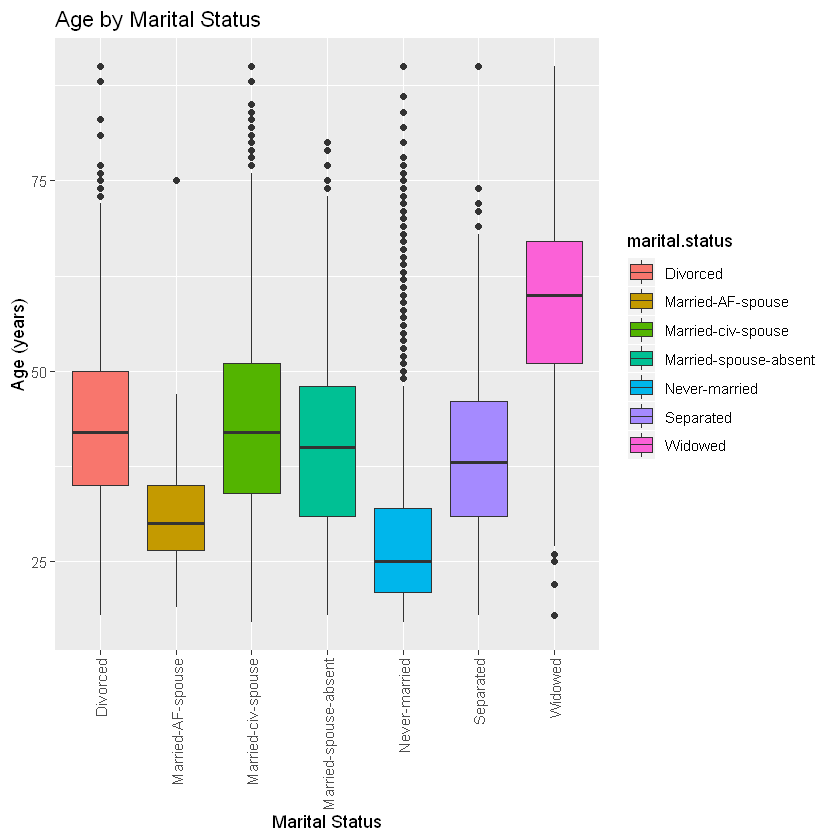

In [50]:
marriage_plot <- ggplot(adult_census, aes(x=marital.status, y = age, fill = marital.status)) +
geom_boxplot() +
labs(x= "Marital Status", y="Age (years)", title= "Age by Marital Status") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
marriage_plotage

The distribution of age varies by marital status more significantly. The oldest group appears to be the widowed group, which makes sense if people are largely dying of old age. The youngest group appears to generally be the never married group, which also makes sense based on the fact that young people may not have had the chance to get married. 

Some factors which we don't expect to be closely associated with age:

- sex
- race

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



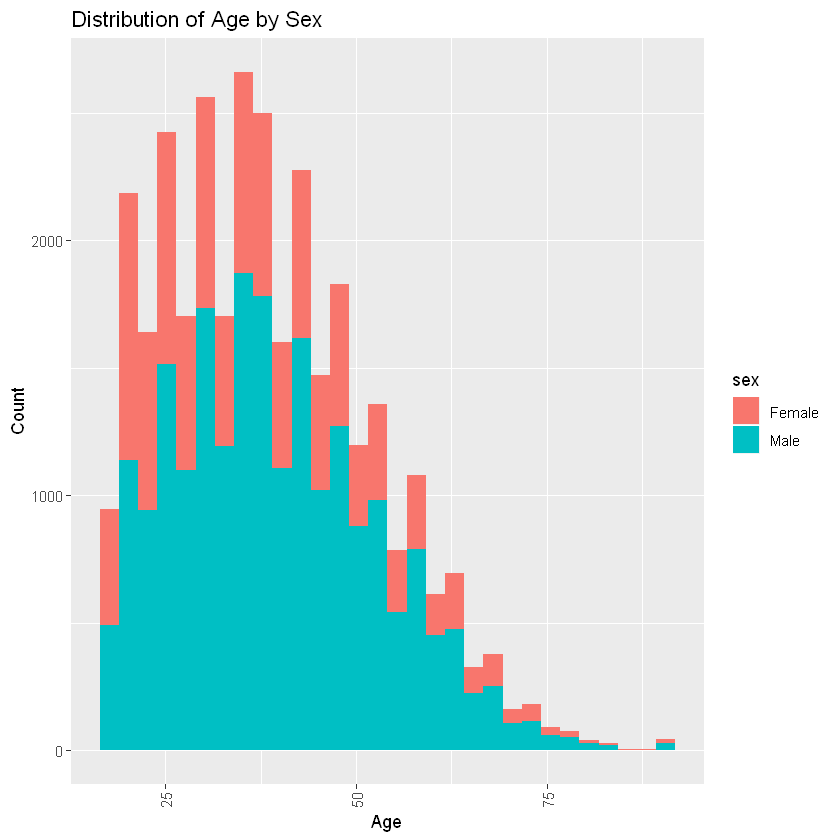

In [53]:
age_sex_plot <- ggplot(adult_census, aes(x=age, fill = sex)) +
geom_histogram() +
labs(x= "Age", y="Count", title= "Distribution of Age by Sex") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
age_sex_plot

There appear to be more females than males, but the proportions appear to remain fairly consistent across all ages.

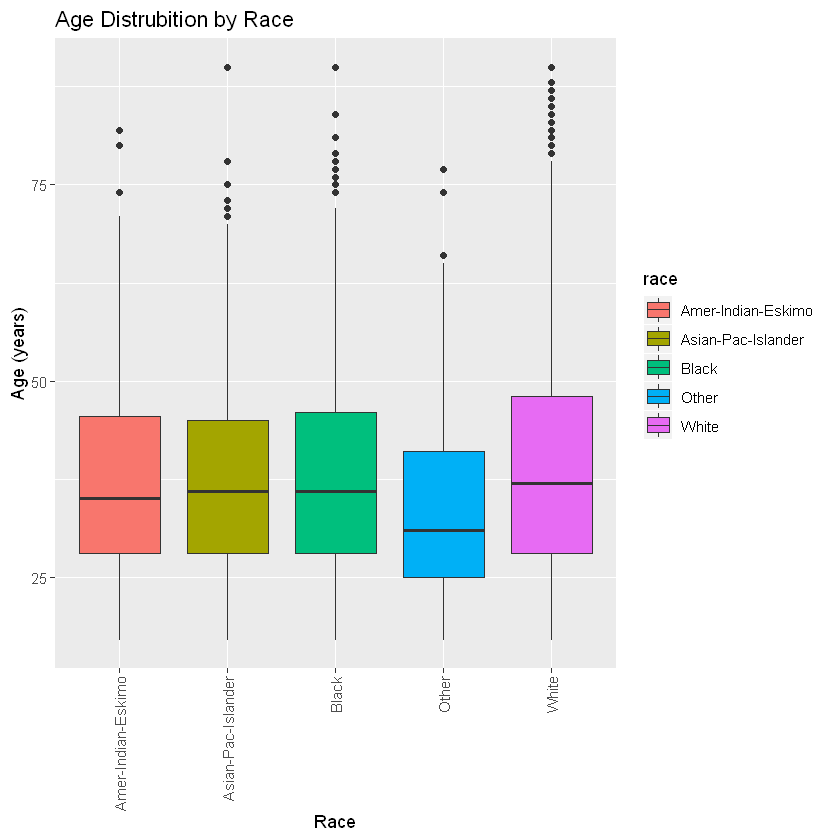

In [55]:
race_plot <- ggplot(adult_census, aes(x=race, y = age, fill = race)) +
geom_boxplot() +
labs(x= "Race", y="Age (years)", title= "Age Distrubition by Race") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
race_plot

Median age and the range all appear fairly similar across all race groups

Some factors we are less sure about:

- hours worked
- capital gain and capital loss

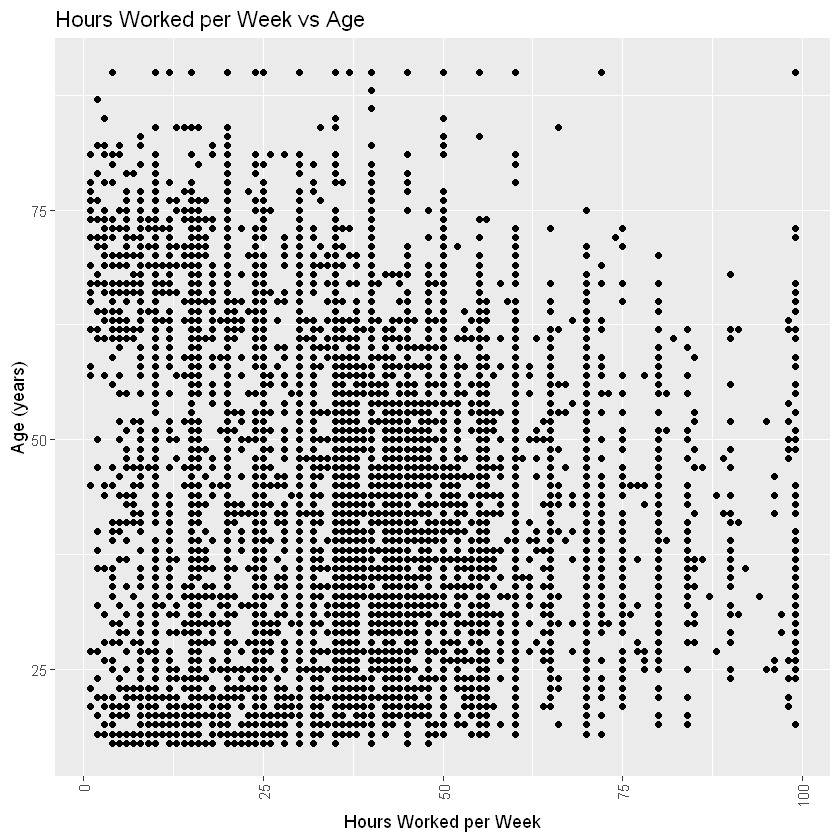

In [57]:
hours_plot <- ggplot(adult_census, aes(x=hours.per.week, y = age)) +
geom_point() +
labs(x= "Hours Worked per Week", y="Age (years)", title= "Hours Worked per Week vs Age") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
hours_plot

At first glance, there is no apparent correlation between hours per week and age.

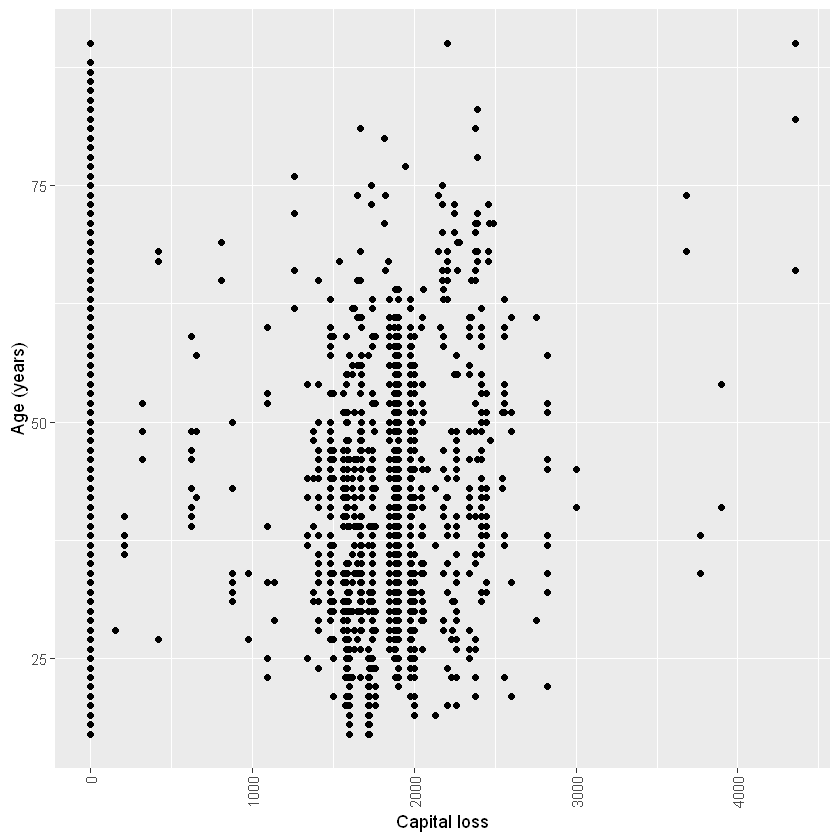

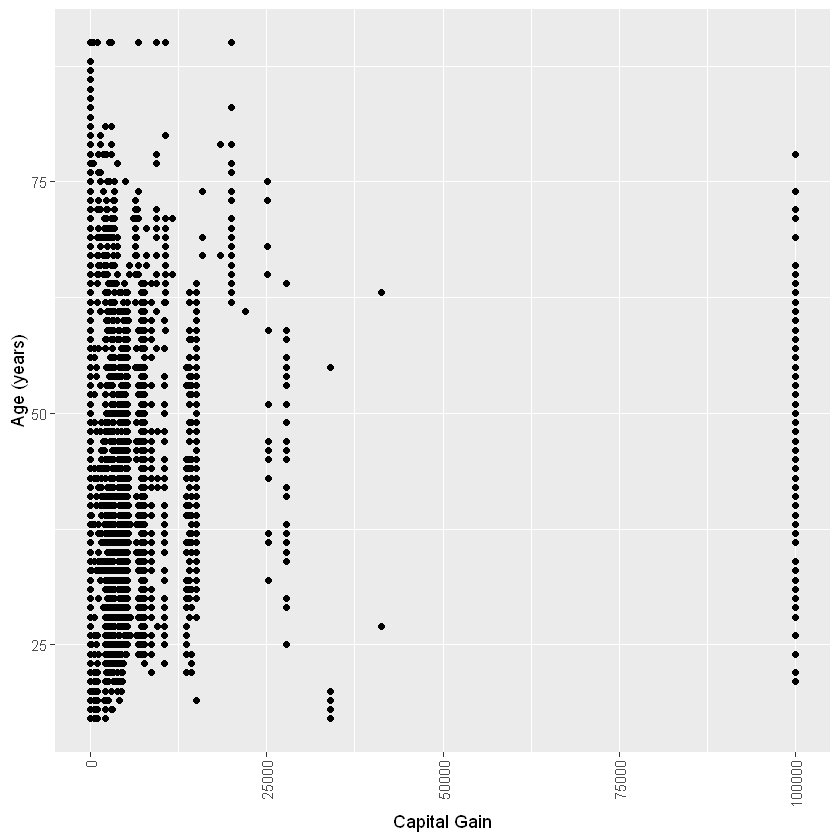

In [59]:
capital_loss_plot <- ggplot(adult_census, aes(x=capital.loss, y = age)) +
geom_point() +
labs(x= "Capital loss", y="Age (years)") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
capital_loss_plot

capital_gain_plot <- ggplot(adult_census, aes(x=capital.gain, y = age)) +
geom_point() +
labs(x= "Capital Gain", y="Age (years)") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
capital_gain_plot

Capital gain does not appear to have much correlation with age, but capital loss appears to increase as the age increases in the upper age range.

## Methods: Plan

Firstly, we will split our data to obtain a training set and a testing set containing 60% and 40% of the observations respectively. Then, we create a multi-linear regression model with our training set by including all the input variables. Afterwards, we will use the function `predict()` to predict our testing set. Then, we will compute the RMSE of the model. 

After obtaining the RMSE, we will perform model selection by using the forward method to select our best optimal model because some variables are insignificant within our data. Since our goal here is to estimate the average age, we would need a prediction model. Hence, we determine our best optimal model by looking at the Cp value.

After we select our best model, we will use the `predict()` function again to predict the testing set and calculate the RMSE. We will then compare the RMSE of both the full model and the newly predicted optimal model, as well as perform the F-test to determine which is better. After we finish determining the best model, we will use it to predict the average age and the 95% confidence interval for prediction (CIP). Since our prediction is used to predict the average age using statistically significant variables, we would have one variation which is the difference between our prediction and the average age of the population.  Finally, we can use our predictive model to predict out-of-sample data.

Our goal here is to build a model that can be used to predict the average age using the statistically significant input variables that we selected by using the forward method. We want to achieve precise prediction by selecting the most optimal model of best fit with the minimum RMSE.

Since our goal is to predict the estimated average age from significant input variables, our results can be used by insurance companies and used for marketing purposes to target specific age groups. It can also be used by governments or even individuals for allocation and other purposes.

## References

Aughinbaugh, A., Robles, O., & Sun, H. (2013). Marriage and divorce: Patterns by gender, race, and educational attainment. Monthly Labor Review. https://doi.org/10.21916/mlr.2013.32

Kohavi, R. & Becker, B. (1994). Adult Census Income [census report] Retrieved November 1st, 2022, from Kaggle. https://www.kaggle.com/datasets/uciml/adult-census-income?search=cite

Patterson, M. (2018, November 6). Who works part time and why? Statistics Canada. Retrieved November 4, 2022, from https://www150.statcan.gc.ca/n1/pub/71-222-x/71-222-x2018002-eng.htm 

